In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
hbar = 1.05457180013e-34
electron_mass = 9.10938356e-31
evtoJ = 1.60217662e-19
jtoEv = 6.241509e18
h = hbar * 2 * np.pi
mtoAng = 1e10
angtoM = 1e-10
omega = 2.5e15
dissoc_energy = 8 # this is in eV
morse_width = 0.2
displacement = -5
L = 10
num_points = 100

unit_length = 2*L/(num_points-1)
kinetic = hbar**2/(2*electron_mass*unit_length**2) * jtoEv * mtoAng**2 # this is in eV

In [41]:
x_grid = [-L + i*unit_length for i in range(num_points)]
x_grid = np.array(x_grid)


In [42]:
potentials = {}
potential_types = ["infinite_well", "arbitrary_well", "finite_well", "rectangle_barrier", "harmonic_well", "morse_well"]

def infinite_well(x):
    return 0

def arbitrary_well(x, height):
    return (x+L)*(height/(2*L))


def finite_well(x, bar):
    if x < -L/2 or x > L/2:
        return bar
    else:
        return 0

def rectangle_barrier(x, bar):
    if x > -L/4 and x < L/4:
        return bar
    else:
        return 0
    
def harmonic_well(x, omega):
    return 0.5 * electron_mass * omega**2 * x**2 * jtoEv * angtoM**2

def morse_well(x, dissoc_energy, morse_width, displacement):
    return dissoc_energy * (1 - np.exp(-morse_width * (x - displacement)))**2


infinite_well_potential = [infinite_well(x) for x in x_grid]
arbitrary_well_potential = [arbitrary_well(x, 8) for x in x_grid]
finite_well_potential = [finite_well(x, 8) for x in x_grid]
rectangle_barrier_potential = [rectangle_barrier(x, 8) for x in x_grid]
harmonic_well_potential = [harmonic_well(x, omega) for x in x_grid]
morse_well_potential = [morse_well(x, dissoc_energy, morse_width, displacement) for x in x_grid]

potentials["infinite_well"] = np.array(infinite_well_potential, dtype=np.float64)
potentials["arbitrary_well"] = np.array(arbitrary_well_potential, dtype=np.float64)
potentials["finite_well"] = np.array(finite_well_potential, dtype=np.float64)
potentials["rectangle_barrier"] = np.array(rectangle_barrier_potential, dtype=np.float64)
potentials["harmonic_well"] = np.array(harmonic_well_potential, dtype=np.float64)
potentials["morse_well"] = np.array(morse_well_potential, dtype=np.float64)




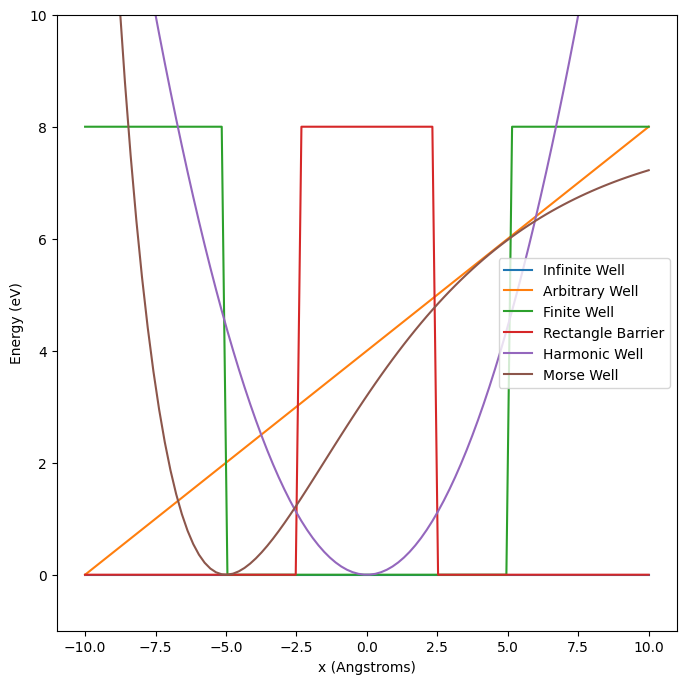

In [43]:
# plotting the potentials
plt.figure(figsize=(8, 8))
plt.plot(x_grid, potentials["infinite_well"], label="Infinite Well")
plt.plot(x_grid, potentials["arbitrary_well"], label="Arbitrary Well")
plt.plot(x_grid, potentials["finite_well"], label="Finite Well")
plt.plot(x_grid, potentials["rectangle_barrier"], label="Rectangle Barrier")
plt.plot(x_grid, potentials["harmonic_well"], label="Harmonic Well")
plt.plot(x_grid, potentials["morse_well"], label="Morse Well")
plt.ylim(-1, 10)
plt.xlabel("x (Angstroms)")
plt.ylabel("Energy (eV)")

plt.legend()
plt.show()

In [44]:
def hamiltonian(potential, kinetic):
    length = len(potential)
    ham = np.zeros((length, length), dtype=np.float64)
    for i in range(length):
        ham[i, i] = 2*kinetic + potential[i]
        if i > 0:
            ham[i, i-1] = -kinetic
            ham[i-1, i] = -kinetic

    return ham

In [45]:
def solve_hamiltonian(ham):
    eigvals, eigvecs = np.linalg.eigh(ham)
    sorted_indices = np.argsort(eigvals)
    eigvals = eigvals[sorted_indices]
    eigvecs = eigvecs[:, sorted_indices]
    return eigvals, eigvecs

def plot5(eigvecs, eigvals, x_grid, num_states, title, potential):
    plt.figure(figsize=(8, 8))
    for i in range(num_states):
        plt.plot(x_grid, eigvals[i] + eigvecs[:, i], label="State " + str(i+1)) 
        # plotting the energy levels
        plt.plot(x_grid, eigvals[i] * np.ones_like(x_grid), "k--")
    
    plt.plot(x_grid, potential, label="Potential")
    plt.xlim(-L, L)
    plt.ylim(0, eigvals[num_states-1] + 1)
    plt.xlabel("x (Angstroms)", fontsize=14, fontweight="bold")
    plt.ylabel("Energy (eV)", fontsize=14, fontweight="bold")
    # plt.ylabel("Energy (eV)", fontsize=14)
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold")
    # plt.ylabel("Energy (eV)")
    plt.title(title)
    # plt.legend()
    plt.savefig(title + ".png")
    plt.show()
    plt.close()

In [46]:
inf_eigvals, inf_eigvecs = solve_hamiltonian(hamiltonian(potentials["infinite_well"], kinetic))
arb_eigvals, arb_eigvecs = solve_hamiltonian(hamiltonian(potentials["arbitrary_well"], kinetic))
fin_eigvals, fin_eigvecs = solve_hamiltonian(hamiltonian(potentials["finite_well"], kinetic))
rect_eigvals, rect_eigvecs = solve_hamiltonian(hamiltonian(potentials["rectangle_barrier"], kinetic))
har_eigvals, har_eigvecs = solve_hamiltonian(hamiltonian(potentials["harmonic_well"], kinetic))
morse_eigvals, morse_eigvecs = solve_hamiltonian(hamiltonian(potentials["morse_well"], kinetic))
analytical_inf = np.array([n**2 * np.pi**2 * hbar**2 / (2*electron_mass*(2*L)**2) * jtoEv * mtoAng**2 for n in range(1, num_points+1)], dtype=np.float64)
analytical_harm = np.array([(n + 0.5) * hbar * omega * jtoEv for n in range(num_points)], dtype=np.float64)

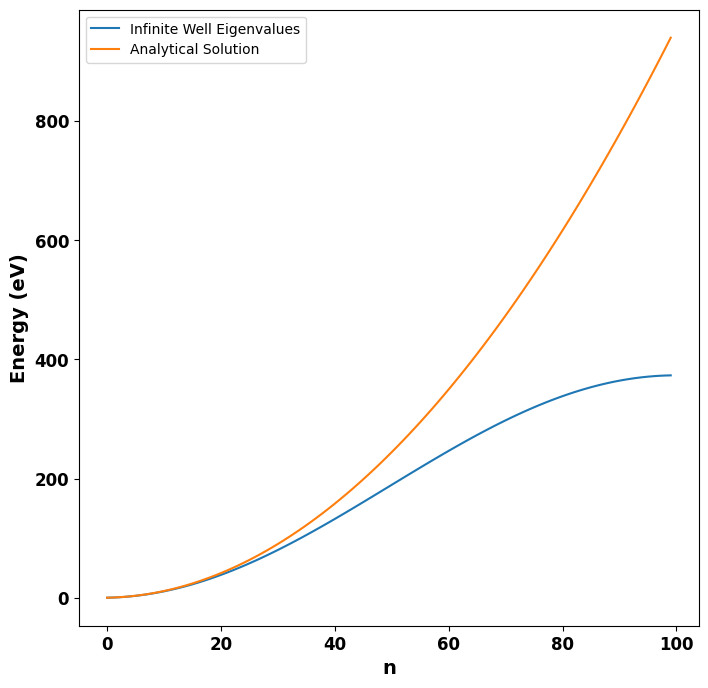

In [47]:
# comparing infinite well eigenvalues with analytical solution
plt.figure(figsize=(8, 8))
plt.plot(inf_eigvals, label="Infinite Well Eigenvalues")
plt.plot(analytical_inf, label="Analytical Solution")
plt.xlabel("n", fontsize=14, fontweight="bold")
plt.ylabel("Energy (eV)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
# plt.ylabel("Energy (eV)")
plt.legend()
plt.savefig("infinite_well_comparison.png")
plt.show()
plt.close()


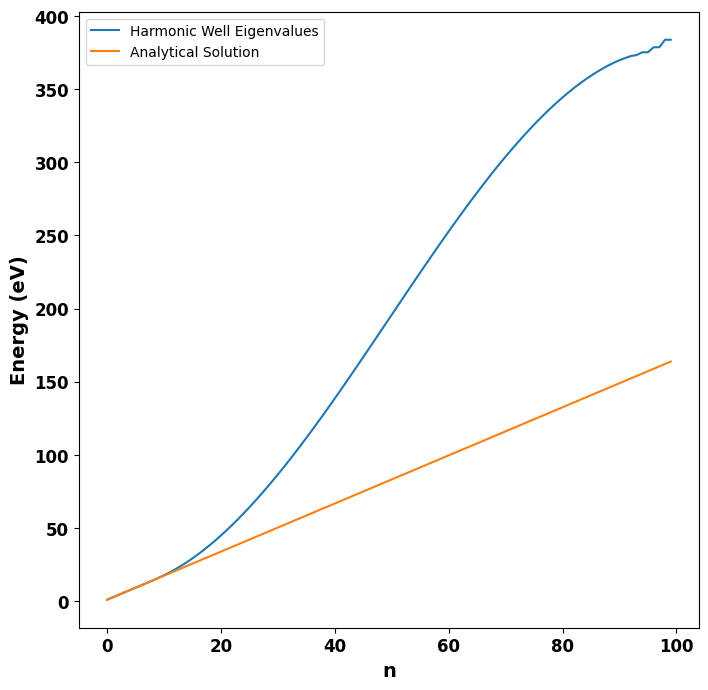

In [48]:
# comparing harmonic well eigenvalues with analytical solution
plt.figure(figsize=(8, 8))
plt.plot(har_eigvals, label="Harmonic Well Eigenvalues")
plt.plot(analytical_harm, label="Analytical Solution")
plt.xlabel("n", fontsize=14, fontweight="bold")
plt.ylabel("Energy (eV)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
# plt.ylabel("Energy (eV)")
plt.legend()
plt.savefig("harmonic_well_comparison.png")
plt.show()
plt.close()

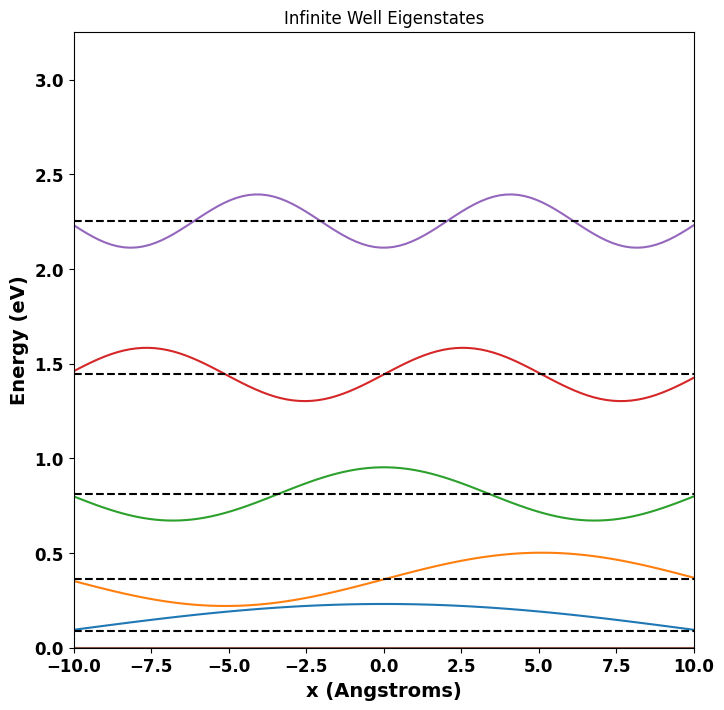

In [49]:
# plotting first 5 eigenstates for infinite well
plot5(inf_eigvecs, inf_eigvals, x_grid, 5, "Infinite Well Eigenstates", potentials["infinite_well"])

In [50]:
print("Infinite Well Eigenvalues")
print(inf_eigvals[:10])

Infinite Well Eigenvalues
[0.09031405 0.36116882 0.81230227 1.44327797 2.25348549 3.24214099
 4.40828803 5.75079843 7.2683734  8.95954478]


In [51]:
print(analytical_inf[:10])

[0.09400754 0.37603015 0.84606784 1.50412061 2.35018845 3.38427136
 4.60636936 6.01648242 7.61461057 9.40075379]


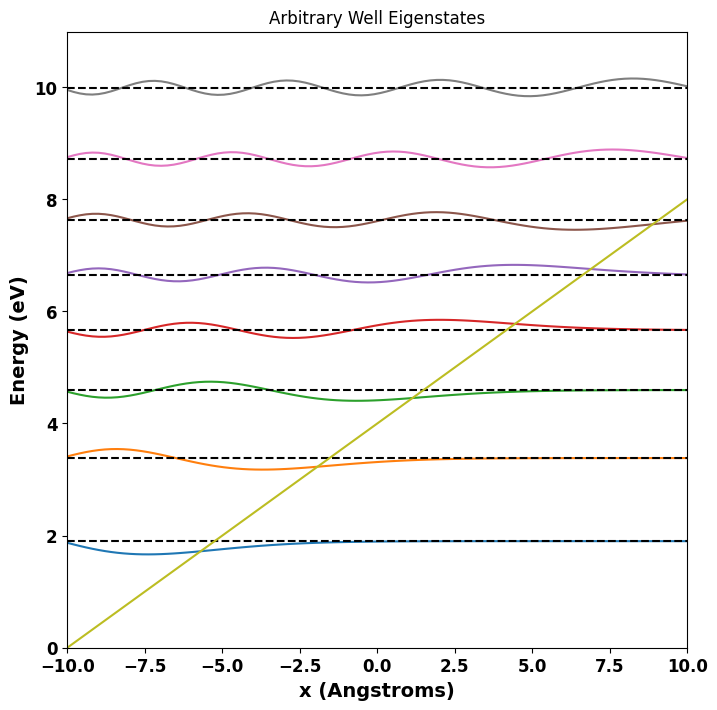

In [52]:
plot5(arb_eigvecs, arb_eigvals, x_grid, 8, "Arbitrary Well Eigenstates", potentials["arbitrary_well"])

In [53]:
print(arb_eigvals)

[  1.90098507   3.38324031   4.59618985   5.66801282   6.65429413
   7.62986534   8.71664917   9.98880987  11.45565454  13.11044588
  14.94676405  16.95972838  19.14542423  21.50045418  24.02167514
  26.70604729  29.55054528  32.55210465  35.70758893  39.01376915
  42.46731118  46.06476817  49.80257621  53.67705243  57.68439458
  61.82068186  66.08187649  70.46382606  74.96226624  79.57282397
  84.29102095  89.11227736  94.03191583  99.04516559 104.14716681
 109.33297501 114.59756567 119.93583894 125.3426244  130.81268598
 136.34072691 141.92139479 147.54928665 153.21895418 158.92490888
 164.66162739 170.42355674 176.20511974 182.00072027 187.80474874
 193.61158741 199.41561587 205.21121641 210.9927794  216.75470876
 222.49142727 228.19738197 233.86704949 239.49494136 245.07560923
 250.60365017 256.07371175 261.48049721 266.81877047 272.08336114
 277.26916933 282.37117055 287.38442032 292.30405878 297.12531519
 301.84351217 306.45406991 310.95251009 315.33445965 319.59565429
 323.73194

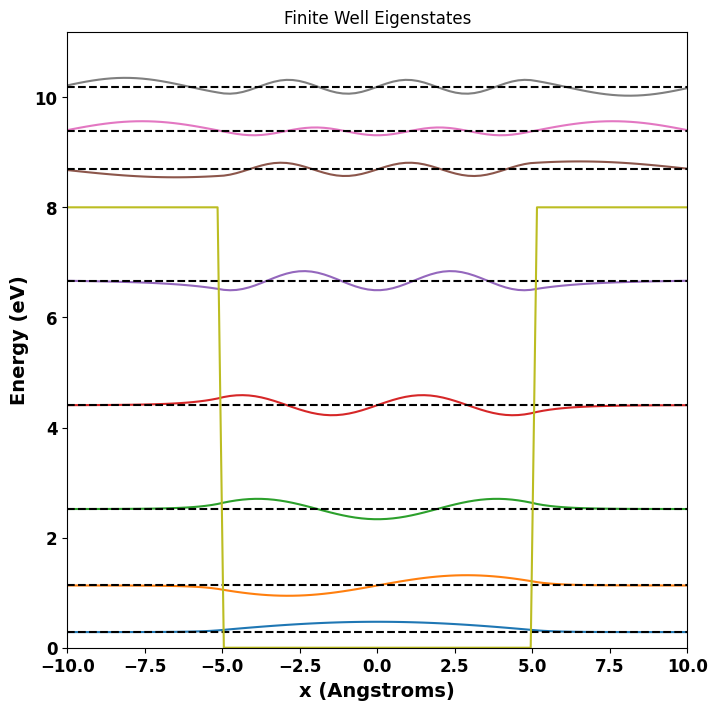

In [54]:
plot5(fin_eigvecs, fin_eigvals, x_grid, 8, "Finite Well Eigenstates", potentials["finite_well"])

In [55]:
print(fin_eigvals)

[2.84073180e-01 1.13049088e+00 2.51940894e+00 4.40563601e+00
 6.66750561e+00 8.68938817e+00 9.37975585e+00 1.01896967e+01
 1.20654081e+01 1.34867915e+01 1.49879443e+01 1.72717485e+01
 1.95116787e+01 2.15508025e+01 2.40852459e+01 2.70018842e+01
 2.97319832e+01 3.25295964e+01 3.58114459e+01 3.92553592e+01
 4.25518726e+01 4.60359089e+01 4.99245717e+01 5.38702692e+01
 5.77188342e+01 6.18000684e+01 6.62096414e+01 7.06199225e+01
 7.49696083e+01 7.95622612e+01 8.44189518e+01 8.92405753e+01
 9.40237142e+01 9.90433974e+01 1.04272962e+02 1.09440274e+02
 1.14579753e+02 1.19941057e+02 1.25465524e+02 1.30903817e+02
 1.36316329e+02 1.41931858e+02 1.47669247e+02 1.53297359e+02
 1.58895337e+02 1.64675753e+02 1.70540865e+02 1.76273284e+02
 1.81966400e+02 1.87821041e+02 1.93726679e+02 1.99475379e+02
 2.05171883e+02 2.11009701e+02 2.16868074e+02 2.22544201e+02
 2.28152197e+02 2.33882836e+02 2.39607063e+02 2.45122565e+02
 2.50551191e+02 2.56086094e+02 2.61591778e+02 2.66861017e+02
 2.72021518e+02 2.772749

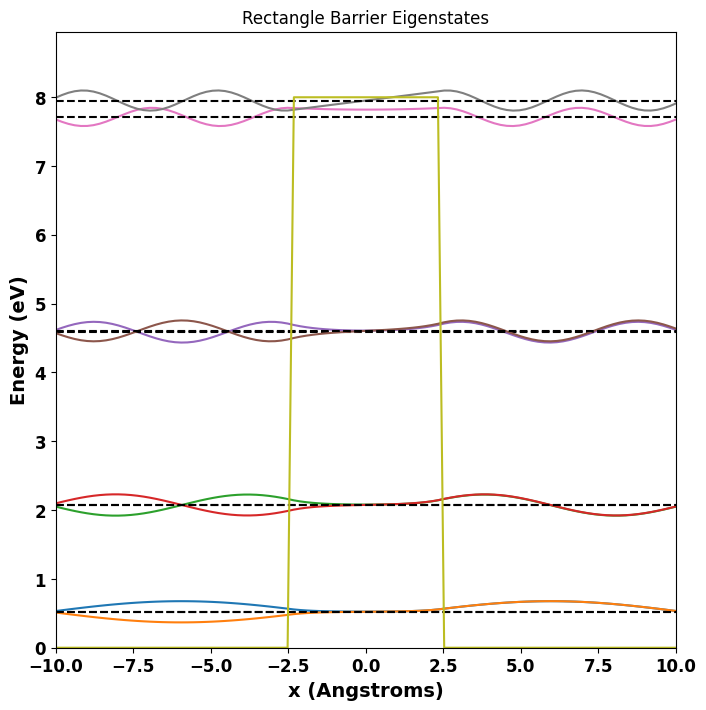

In [56]:
plot5(rect_eigvecs, rect_eigvals, x_grid, 8, "Rectangle Barrier Eigenstates", potentials["rectangle_barrier"])

In [57]:
print(rect_eigvals)

[  0.52216376   0.52254355   2.07291789   2.07568489   4.58574844
   4.60489438   7.71423157   7.95254957   9.6898205   11.58626223
  12.87954196  14.93403606  17.38814323  19.33958717  22.02531425
  24.80754663  27.34724966  30.61033738  33.68218256  36.83705185
  40.54149149  43.93334304  47.7040346   51.70864314  55.4982847
  59.80390512  64.02921359  68.29281385  72.98185561  77.43520193
  82.18797678  87.10421212  91.85219169  97.01431278 102.06759104
 107.17473937 112.59454065 117.78551548 123.25055571 128.77707352
 134.16388617 139.89121383 145.44453032 151.07538872 156.90805363
 162.49759222 168.34741013 174.14456945 179.82744205 185.7791254
 191.48125878 197.28974374 203.18077316 208.81552851 214.69728246
 220.40323571 226.03115398 231.845146   237.33674429 242.97242825
 248.554046   253.88515234 259.44352905 264.6953829  269.93134878
 275.2449637  280.18127762 285.31159046 290.22177954 294.93095943
 299.82549429 304.28123184 308.82903594 313.29027789 317.37069322
 321.6991338

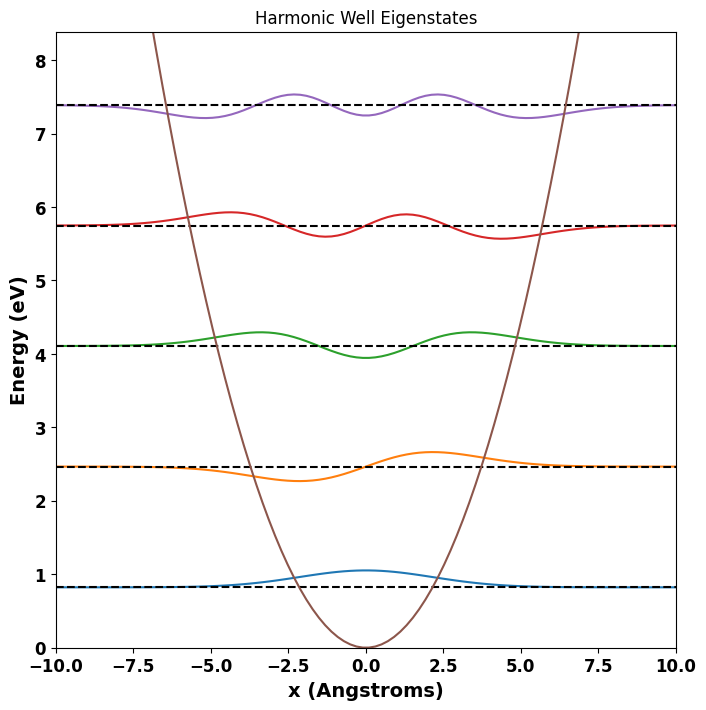

In [58]:
plot5(har_eigvecs, har_eigvals, x_grid, 5, "Harmonic Well Eigenstates", potentials["harmonic_well"])

In [59]:
print(har_eigvals)

[  0.82231147   2.46602654   4.10792547   5.74801826   7.38640512
   9.02368048  10.6624157   12.31086053  13.98842892  15.72812469
  17.57014371  19.54961266  21.68862774  23.99679542  26.47590163
  29.12400851  31.93773203  34.91323299  38.04657716  41.33383734
  44.77110282  48.35446085  52.07997353  55.94365746  59.94146792
  64.06928722  68.32291671  72.69807155  77.19037767  81.79537045
  86.50849465  91.32510541  96.24047004 101.24977039 106.34810583
 111.53049653 116.79188715 122.12715082 127.53109325 132.9984572
 138.52392695 144.10213302 149.72765697 155.3950363  161.09876946
 166.83332091 172.59312626 178.37259741 184.16612785 189.96809783
 195.77287968 201.57484309 207.36836042 213.14781193 218.90759114
 224.64211002 230.34580425 236.01313841 241.6386111  247.21676007
 252.74216716 258.20946331 263.61333337 268.94852079 274.20983229
 279.39214225 284.49039701 289.49961893 294.41491024 299.23145652
 303.94452995 308.54949204 313.04179586 317.41698768 321.67070768
 325.798689

In [60]:
print(analytical_harm[:10])

[ 0.82276492  2.46829477  4.11382461  5.75935446  7.4048843   9.05041415
 10.695944   12.34147384 13.98700369 15.63253353]


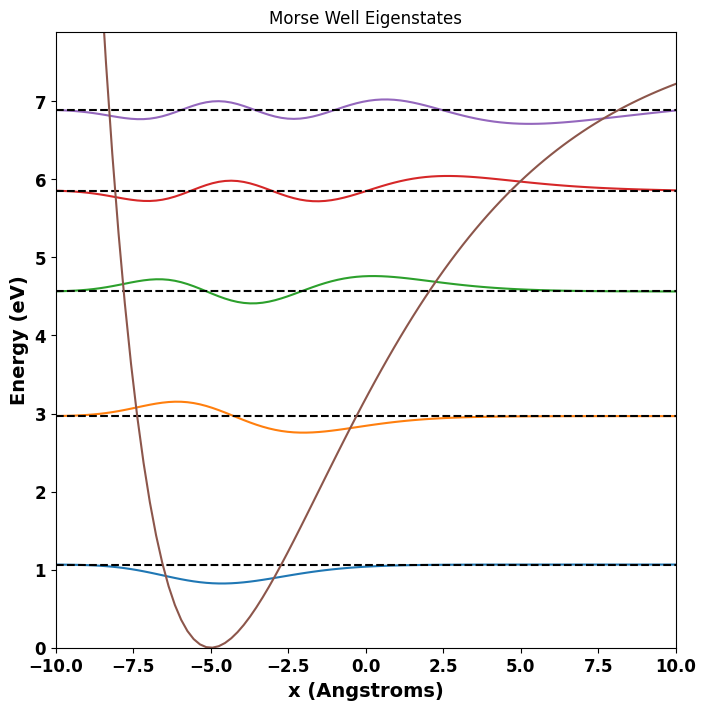

In [61]:
plot5(morse_eigvecs, morse_eigvals, x_grid, 5, "Morse Well Eigenstates", potentials["morse_well"])

In [62]:
print(morse_eigvals)

[  1.06535049   2.96689294   4.56325117   5.85690833   6.89089171
   7.89639004   9.09522502  10.50150569  12.09184079  13.85137483
  15.77155705  17.84791163  20.07866718  22.46362875  25.00319212
  27.6976036   30.54653712  33.54895209  36.70312862  40.00677891
  43.45716891  47.05122105  50.78559069  54.65671932  58.66087045
  62.79415345  67.05253967  71.43187366  75.92788143  80.53617695
  85.25226759  90.07155899  94.98935972 100.00088571 105.10126474
 110.28554093 115.54867931 120.88557042 126.29103509 131.75982917
 137.28664849 142.86613378 148.49287569 154.16141993 159.86627238
 165.6019043  171.36275762 177.14325014 182.93778091 188.74073551
 194.54649144 200.34942345 206.14390891 211.92433317 217.68509487
 223.42061133 229.12532377 234.79370266 240.42025288 245.99951896
 251.52609017 256.99460559 262.3997591  267.73630429 272.99905927
 278.18291136 283.28282168 288.29382958 293.2110569  298.0297121
 302.74509408 307.35259584 311.84770778 316.22602063 320.48322797
 324.615128

In [63]:
# checking permeation of the wavefunction into finite well
permeation = []

for i in range(5):
    temp = 0
    for j in range(num_points):
        if x_grid[j] < -L/2 or x_grid[j] > L/2:
            temp += fin_eigvecs[j, i]**2
    permeation.append(temp)

permeation


[0.004284649629940675,
 0.017925581851450247,
 0.04399208536214323,
 0.09174395689592718,
 0.20169492733411373]

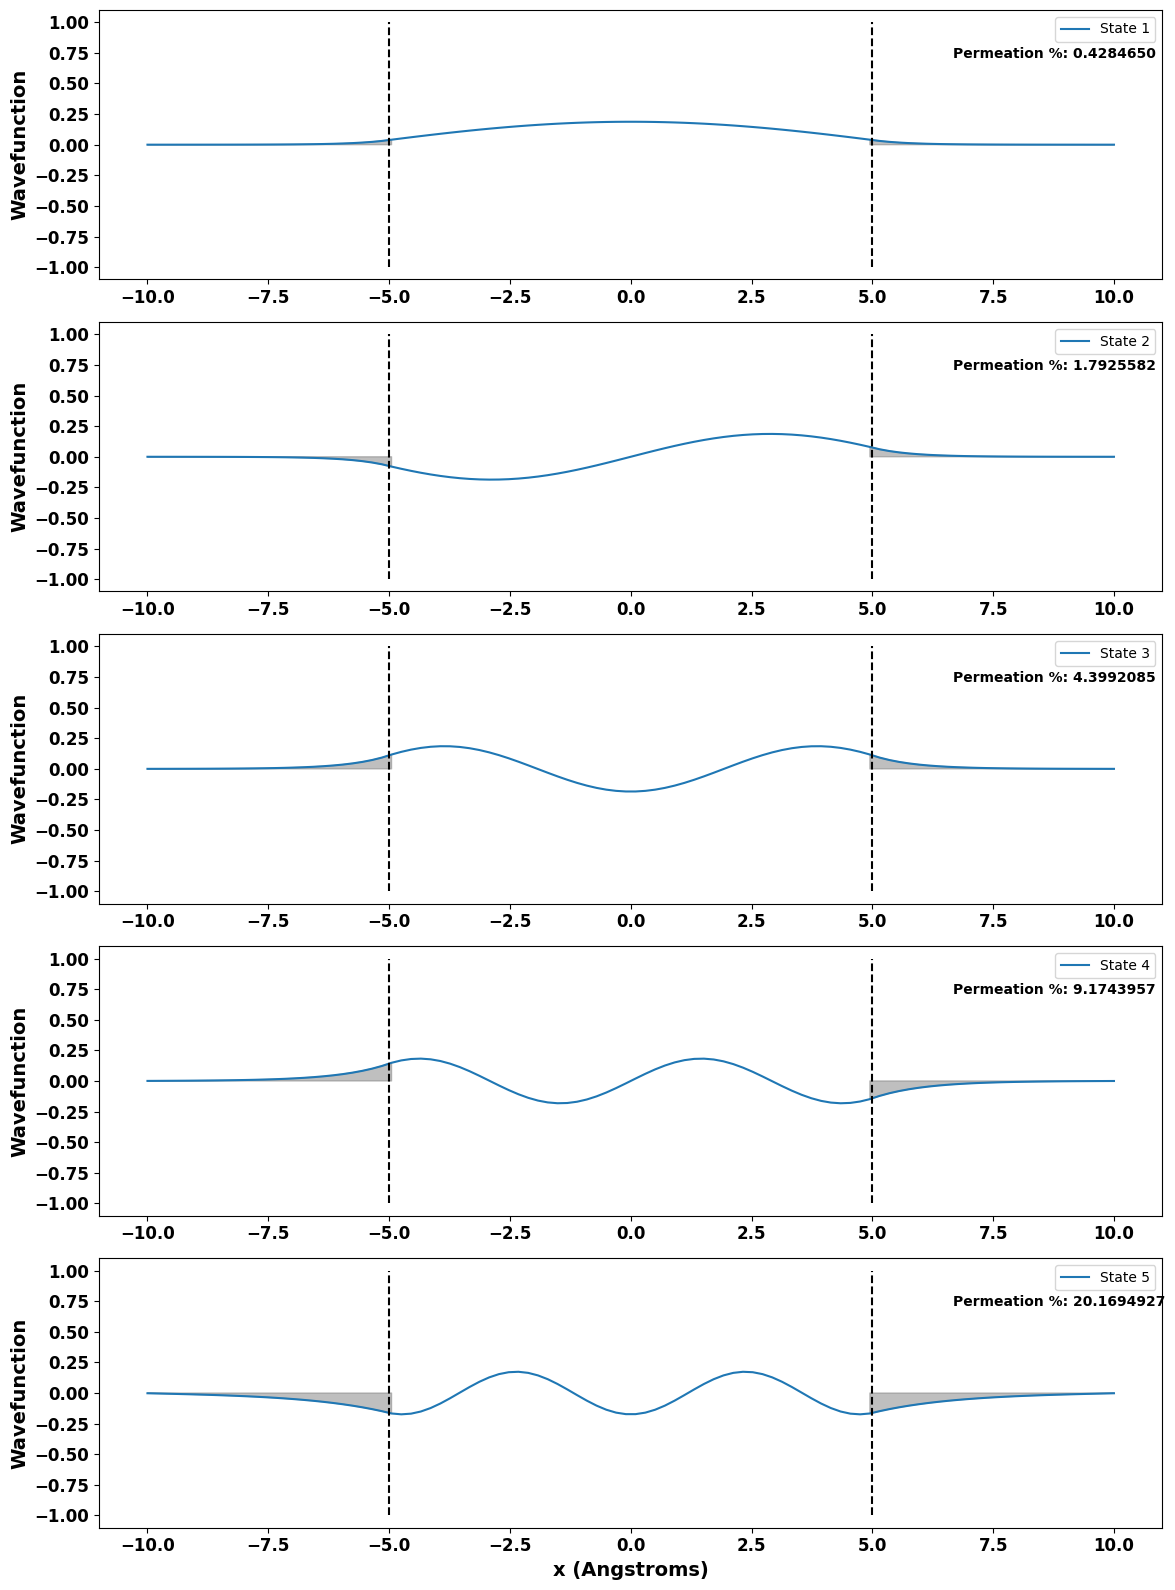

In [64]:
#shadin area under the curve where it permeates
plt.subplots(5, 1, figsize=(12, 16))
# plt.title("Finite Well Eigenstates Permeation")

for i in range(5):
    # if(i == 0):
        # plt.title("Finite Well Eigenstates Permeation")
    plt.subplot(5, 1, i+1)
    plt.plot(x_grid, fin_eigvecs[:, i], label="State " + str(i+1))
    plt.fill_between(x_grid, fin_eigvecs[:, i], where=(x_grid <= -L/2+0.06) | (x_grid >= L/2-0.06), color="gray", alpha=0.5)
    plt.text(6.67, 0.71, "Permeation %: " + f"{round(permeation[i]*100, 7):.7f}",fontsize=10, fontweight='bold')
    plt.vlines(-L/2, -1, 1, color="black", linestyle="--")
    plt.vlines(L/2, -1, 1, color="black", linestyle="--")
    plt.xticks(fontsize=12, fontweight="bold")
    plt.yticks(fontsize=12, fontweight="bold") 
    # plt.xlabel("x (Angstroms)")
    plt.ylabel("Wavefunction", fontsize=14, fontweight="bold")
    # plt.title("State " + str(i+1))
    plt.legend()
# shared x axis
plt.xlabel("x (Angstroms)", fontsize=14, fontweight="bold")

plt.tight_layout()
plt.savefig("finite_well_permeation.png")
plt.show()
plt.close()

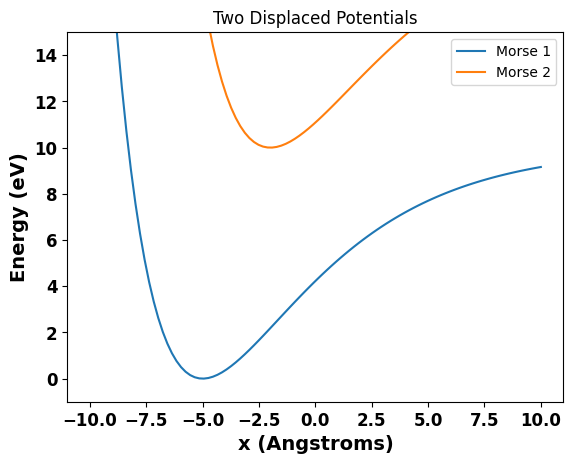

<Figure size 640x480 with 0 Axes>

In [65]:
# making 2 displaced morse wells

morse1 = np.array([morse_well(x, 10, 0.21, -5) for x in x_grid], dtype=np.float64)
morse2 = np.array([morse_well(x, 10, 0.2, -2) for x in x_grid], dtype=np.float64)

morse2 = morse2 + 10

plt.plot(x_grid, morse1, label="Morse 1")
plt.plot(x_grid, morse2, label="Morse 2")
plt.xlabel("x (Angstroms)", fontsize=14, fontweight="bold")
plt.ylabel("Energy (eV)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Two Displaced Potentials")
plt.legend()
plt.ylim(-1, 15)
plt.show()
plt.savefig("morse_wells.png")

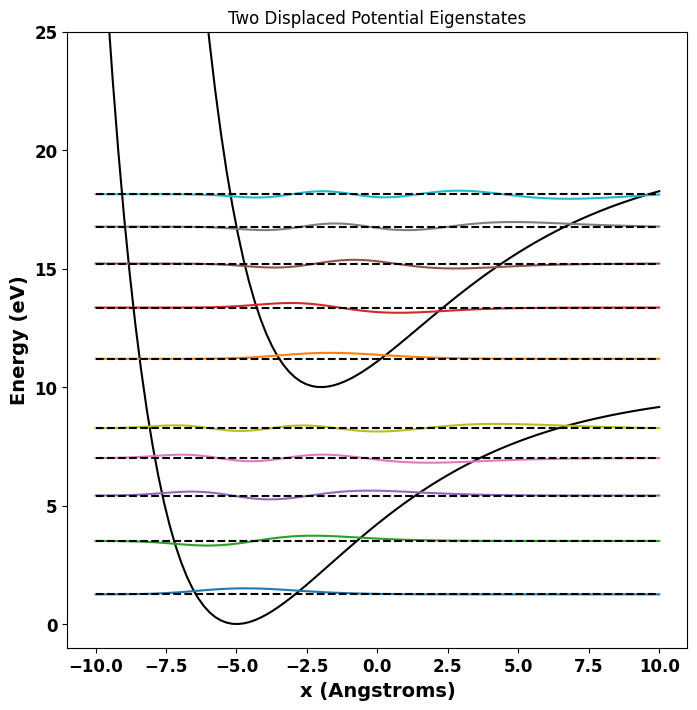

In [66]:
morse1_eigvals, morse1_eigvecs = solve_hamiltonian(hamiltonian(morse1, kinetic))
morse2_eigvals, morse2_eigvecs = solve_hamiltonian(hamiltonian(morse2, kinetic))

plt.figure(figsize=(8, 8))
plt.plot(x_grid, morse1, label="Morse 1", color="black")
plt.plot(x_grid, morse2, label="Morse 2", color="black")
for i in range(5):
    plt.plot(x_grid, morse1_eigvals[i] + -morse1_eigvecs[:, i], label="State " + str(i+1) + " Morse 1")
    plt.plot(x_grid, morse2_eigvals[i] + -morse2_eigvecs[:, i], label="State " + str(i+1) + " Morse 2")
    plt.plot(x_grid, morse1_eigvals[i] * np.ones_like(x_grid), "k--")
    plt.plot(x_grid, morse2_eigvals[i] * np.ones_like(x_grid), "k--")
plt.xlabel("x (Angstroms)", fontsize=14, fontweight="bold")
plt.ylabel("Energy (eV)", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Two Displaced Potential Eigenstates")
plt.ylim(-1, 25)
# plt.legend()
plt.savefig("morse_wells_eigenstates.png")
plt.show()

In [82]:
morse1_eigvals[:5]



array([1.2531938 , 3.50664092, 5.42320255, 7.00471466, 8.26237933])

In [83]:
morse2_eigvals[:5]

array([11.19546276, 13.35690399, 15.21276428, 16.77241935, 18.14219855])

In [67]:
# calculating franck condon factors
frank_condon = np.zeros((5, 5), dtype=np.float64)

for i in range(5):
    for j in range(5):
        frank_condon[i, j] = np.dot(morse1_eigvecs[:, i], morse2_eigvecs[:, j])**2


min_del_e = morse2_eigvals[0] - morse1_eigvals[4]
max_del_e = morse2_eigvals[4] - morse1_eigvals[0]




In [68]:
print(frank_condon)

[[0.25280006 0.17685404 0.12057201 0.08237028 0.06545649]
 [0.57809218 0.00639364 0.00341116 0.01353616 0.02131853]
 [0.16612436 0.50729859 0.0430238  0.01425726 0.00236011]
 [0.00139117 0.28878232 0.44920858 0.02591095 0.0292872 ]
 [0.00064882 0.01666241 0.31157149 0.47391371 0.00587487]]


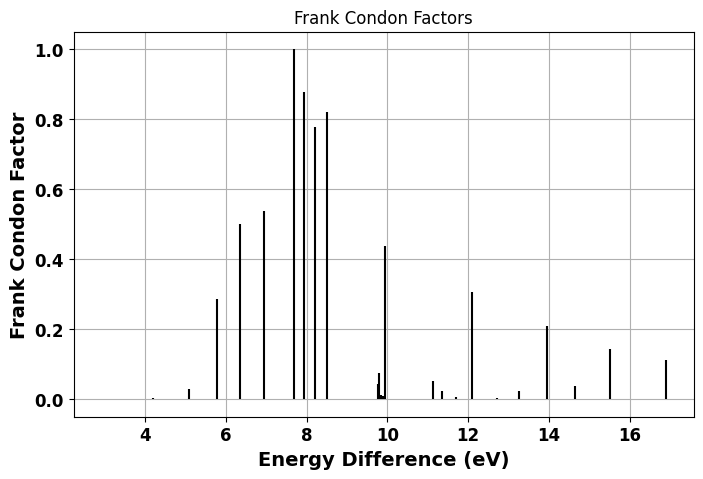

In [79]:
deles = []
fcs = []

for i in range(5):
    for j in range(5):
        deles.append(morse2_eigvals[j] - morse1_eigvals[i])
        fcs.append(frank_condon[i, j])

indices = np.argsort(deles)
deles = np.array(deles)[indices]
fcs = np.array(fcs)[indices]
fcs = fcs / np.max(fcs)

# vertical peaks at the energy differences
plt.figure(figsize=(8, 5))
for i in range(len(deles)):
    plt.vlines(deles[i], 0, fcs[i], color="black")
plt.xlabel("Energy Difference (eV)", fontsize=14, fontweight="bold")
plt.ylabel("Frank Condon Factor", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Frank Condon Factors")
plt.grid(True)
plt.savefig("frank_condon.png")
plt.show()
plt.close()



In [69]:
morse1_eigvals[:5]

array([1.2531938 , 3.50664092, 5.42320255, 7.00471466, 8.26237933])

In [70]:
morse2_eigvals[:5]

array([11.19546276, 13.35690399, 15.21276428, 16.77241935, 18.14219855])

In [71]:
def gaussian(x, mu, sigma):
    """ Returns a Gaussian peak centered at mu with width sigma """
    return np.exp(-0.5 * ((x - mu) / sigma) ** 2) / (sigma * np.sqrt(2 * np.pi))


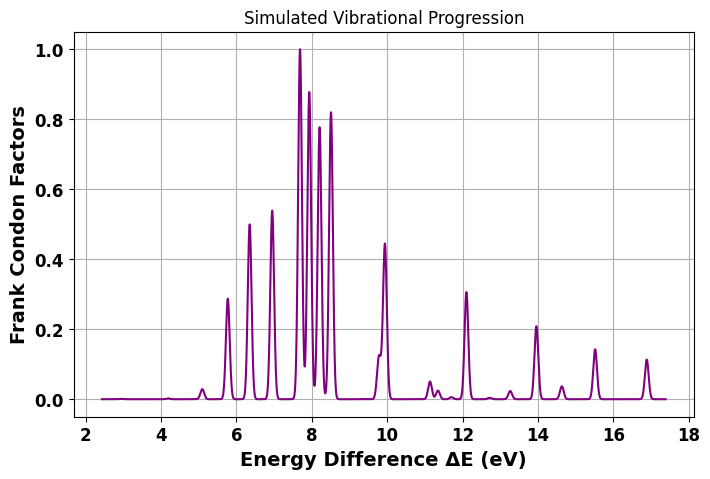

In [81]:
import numpy as np
import matplotlib.pyplot as plt

sigma = 0.05
del_grid = np.linspace(min_del_e - 0.5, max_del_e + 0.5, 100000)
spectrum = np.zeros_like(del_grid, dtype=np.float64)

for i in range(5):
    for j in range(5):
        transition_energy = morse2_eigvals[j] - morse1_eigvals[i]
        intensity = frank_condon[i, j]
        spectrum += intensity * gaussian(del_grid, transition_energy, sigma)

spectrum /= np.max(spectrum)

plt.figure(figsize=(8, 5))
plt.plot(del_grid, spectrum, color="purple")
plt.xlabel("Energy Difference ΔE (eV)", fontsize=14, fontweight="bold")
plt.ylabel("Frank Condon Factors", fontsize=14, fontweight="bold")
plt.xticks(fontsize=12, fontweight="bold")
plt.yticks(fontsize=12, fontweight="bold")
plt.title("Simulated Vibrational Progression")
# plt.legend()
plt.grid(True)
plt.savefig("vibrational_progression.png")
plt.show()


In [73]:
# comparing accuracy of eigenvalues for infinite well to analytical solution as number of points increases
num_points = [100, 500, 1000, 2000, 5000]
errors_for_first_eigenvalue = []

for num in num_points:
    print(num)
    x_grid = [-L + i*unit_length for i in range(num)]
    x_grid = np.array(x_grid)
    unit_length = 2*L/(num-1)
    kinetic = hbar**2/(2*electron_mass*unit_length**2) * jtoEv * mtoAng**2
    inf_eigvals, inf_eigvecs = solve_hamiltonian(hamiltonian([0 for i in range(num)], kinetic))
    analytical_inf = np.pi**2 * hbar**2 / (2*electron_mass*(2*L)**2) * jtoEv * mtoAng**2
    errors_for_first_eigenvalue.append(np.abs(inf_eigvals[0] - analytical_inf))



100
500
1000
2000
5000


In [74]:
print([f"{e:.25f}" for e in errors_for_first_eigenvalue])

['0.0036934907429467256356759', '0.0007493666459807701851759', '0.0003753560709318232158083', '0.0001878464633337240119459', '0.0000751791736073176286581']
